<a href="https://colab.research.google.com/github/ucinopitasafitri/PRAKTIKUM-MACHINE-LEARNING/blob/main/PERTEMUAN_II_dan_III_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum III Machine Learning**

'''
=================================================
Nama  : Uci Nopita Safitri

NPM : F1F022026

=================================================
'''

# Latar Belakang

Perkembangan teknologi informasi dan ilmu data dalam beberapa dekade terakhir telah memberikan dampak signifikan terhadap berbagai bidang, terutama dalam hal pemanfaatan metode komputasi untuk pengambilan keputusan. Salah satu cabang penting dalam ilmu data adalah machine learning, yang berperan dalam membangun model prediktif berbasis data historis agar dapat melakukan klasifikasi maupun prediksi secara otomatis. Machine learning kini digunakan dalam berbagai domain seperti kesehatan, bisnis, pendidikan, dan keamanan data karena kemampuannya mengolah data dalam jumlah besar dengan tingkat akurasi yang tinggi (Santoso, 2021).

Dalam konteks klasifikasi data, terdapat berbagai algoritma yang dapat digunakan, salah satunya adalah Decision Tree, yang dikenal karena interpretabilitas serta kemampuannya memvisualisasikan proses pengambilan keputusan. Decision Tree mampu membagi data berdasarkan atribut prediktor sehingga menghasilkan struktur pohon yang mudah dipahami oleh pengguna, bahkan yang tidak memiliki latar belakang teknis yang kuat. Selain itu, Decision Tree dapat digunakan baik untuk klasifikasi maupun regresi tergantung pada tipe label data yang digunakan (Ramadhani, 2020).

Selain Decision Tree, algoritma lain yang umum digunakan dalam klasifikasi adalah K-Nearest Neighbors (KNN). Algoritma ini bekerja berdasarkan prinsip kedekatan antar data sehingga prediksi dilakukan dengan membandingkan data baru dengan sejumlah tetangga terdekat dalam ruang fitur. KNN termasuk metode yang sederhana, namun tetap efektif dan sering dijadikan pembanding dalam penelitian klasifikasi karena fleksibilitas dan akurasi yang kompetitif (Nurhadi, 2019).

Evaluasi performa model klasifikasi sangat penting untuk memastikan bahwa model mampu memberikan prediksi yang baik. Beberapa metrik evaluasi yang umum digunakan antara lain confusion matrix, accuracy score, dan precision–recall, yang dapat memberikan gambaran tentang kesalahan klasifikasi dan efektivitas model dalam memprediksi data baru. Pemilihan metrik evaluasi juga bergantung pada jenis dataset serta tujuan analisis yang ingin dicapai (Wijaya, 2022).

Melalui pembelajaran dua algoritma ini—Decision Tree dan K-Nearest Neighbors—mahasiswa diharapkan mampu memahami konsep dasar klasifikasi, mengimplementasikan algoritma berbasis Python, serta mengevaluasi performa model secara sistematis. Selain itu, latihan mandiri dengan dataset yang berbeda memberikan pengalaman praktis mendalam sehingga keterampilan analisis data dapat berkembang secara optimal (Fadillah, 2021).

# Rumusan Masalah

PERTEMUAN II
1. Apa yang dimaksud dengan konsep dasar algoritma Decision Tree dalam machine learning?

2. Bagaimana cara membedakan antara Classification Tree dan Regression Tree berdasarkan fungsi serta tipe data yang diprediksi?

3. Bagaimana cara membangun dan menerapkan model Decision Tree untuk tugas klasifikasi menggunakan dataset yang tersedia?

4. Bagaimana cara mengevaluasi performa model Decision Tree menggunakan metrik evaluasi seperti confusion matrix dan accuracy score?

5. Bagaimana interpretasi hasil model yang dihasilkan, baik dalam bentuk metrik evaluasi maupun visualisasi pohon keputusan?

6. Bagaimana tingkat kemampuan mahasiswa dalam melakukan analisis dan penerapan Decision Tree pada dataset berbeda melalui latihan mandiri?

PERTEMUAN III
1. Apa konsep dasar algoritma K-Nearest Neighbors (KNN) dalam menyelesaikan permasalahan klasifikasi?

2. Bagaimana langkah-langkah mengimplementasikan algoritma KNN menggunakan pustaka Scikit-learn di Python?

3. Bagaimana performa model KNN dapat dievaluasi menggunakan metrik evaluasi seperti accuracy score dan confusion matrix?


# Tujuan Penelitian


PERTEMUAN II
1.   Menjelaskan konsep dasar algoritma Decision Tree.
2.   Membedakan antara Classification Tree dan Regression Tree.
3.   Menerapkan Decision Tree untuk klasifikasi.
4.   Melakukan evaluasi model Decision Tree menggunakan confusion matrix dan accuracy score.
5.   Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.   
6.   Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain.


PERTEMUAN III
1.   Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk klasifikasi.
2.   Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
3. Mengevaluasi performa model KNN menggunakan accuracy score dan confusion matrix


# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [144]:
!pip install feature_engine

In [145]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Memuat Data

Dataset yang akan digunakan adalah "Breast Cancer (Diagnostic)" untuk memprediksi apakah sebuah tumor bersifat ganas (malignant) atau jinak (benign).
Hingga akhirnya harus membandingkan kinerja kedua model yaitu (Decision Tree dan K-Nearest Neighbors (KNN)) tersebut dan memberikan kesimpulan model mana yang lebih baik untuk dataset ini. Dataset yang digunakan adalah Breast Cancer (Diagnostic) https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv.

In [146]:
# Data Loading

data_df = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Analisis Data Eksploratif

In [147]:
print(df.describe())                 # untuk numerik
print(df.describe(include='object')) # untuk kategorik

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

diagnosis
B    357
M    212
Name: count, dtype: int64


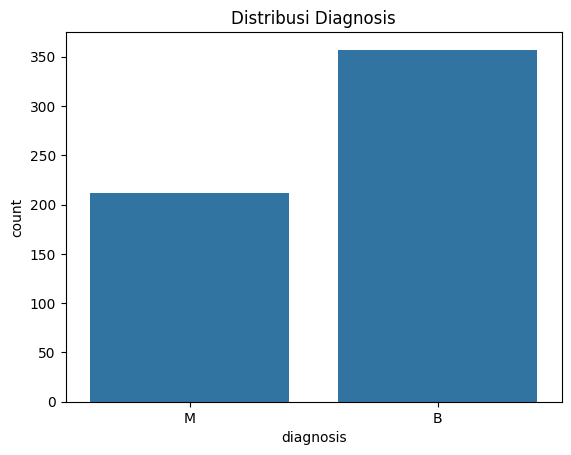

In [148]:
# ============================================================
# Cek distribusi variabel target (diagnosis)
# ============================================================
print(df['diagnosis'].value_counts())

sns.countplot(x='diagnosis', data=df)
plt.title("Distribusi Diagnosis")
plt.show()

Dataset kanker payudara ini berisi 569 observasi dengan 30 fitur numerik mengenai karakteristik sel tumor. Distribusi diagnosis menunjukkan lebih banyak sampel jinak dibanding ganas. Variasi antar fitur cukup besar, sehingga preprocessing seperti normalisasi, scaling, atau penanganan outlier diperlukan sebelum model machine learning diterapkan.

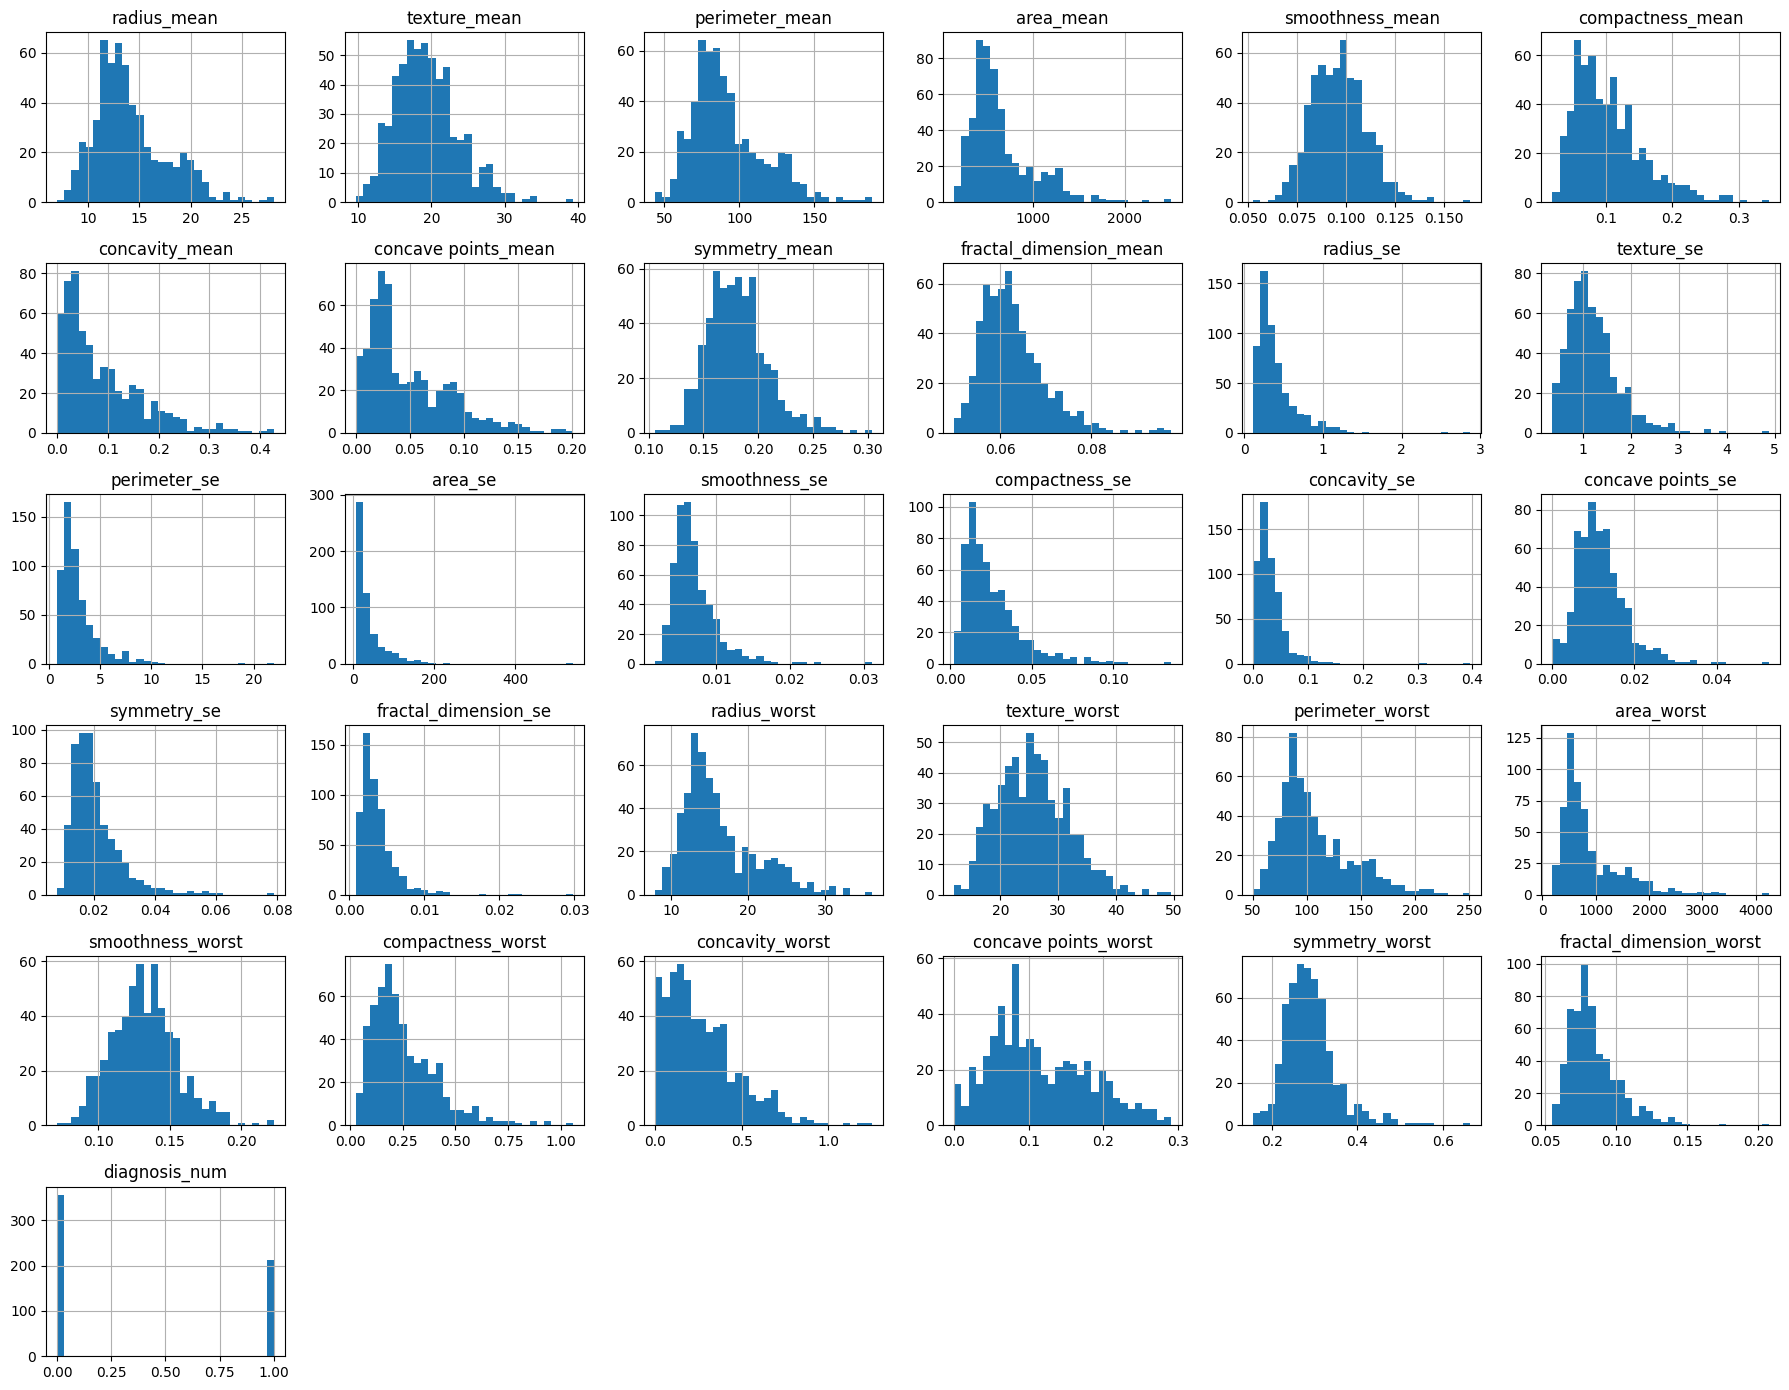

In [149]:
# ============================================================
# Distribusi variabel numerik (Histogram)
# ============================================================
df.hist(figsize=(18, 14), bins=30)
plt.tight_layout()
plt.show()

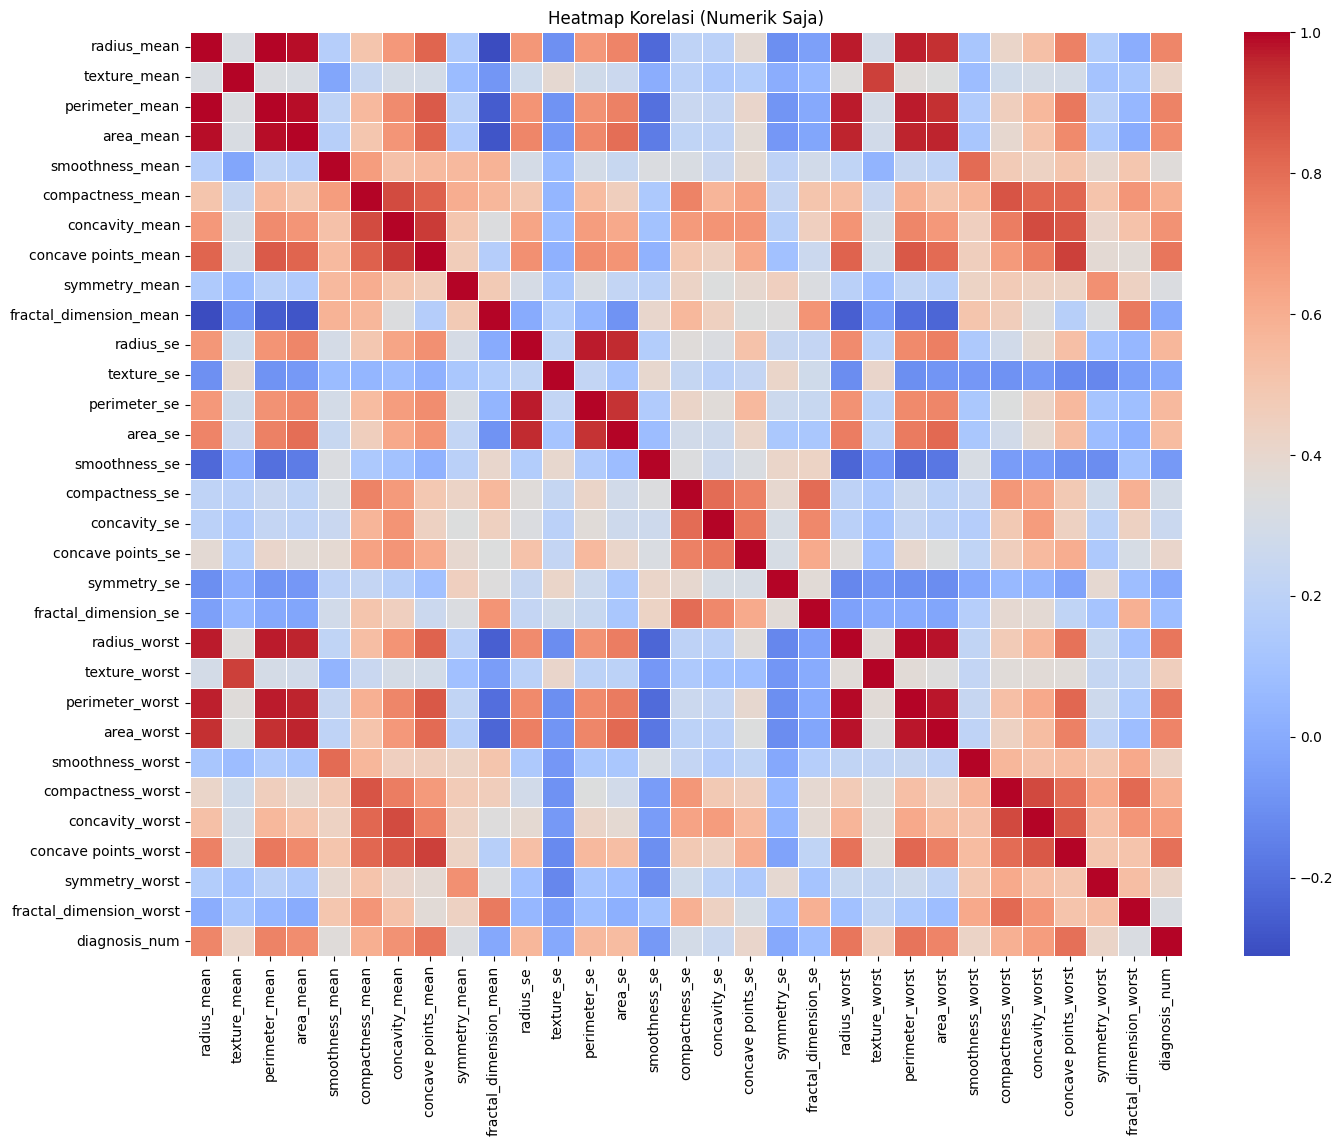

In [150]:
# ============================================================
# Correlation Heatmap
# ============================================================
# pilih hanya kolom numerik
df_num = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(16, 12))
sns.heatmap(df_num.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi (Numerik Saja)")
plt.show()

# _Feature Engineering_

## A - Missing Value

In [151]:
# ============================================================
#  Cek missing values
# ============================================================
print(data_df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Berdasarkan hasil pemeriksaan missing values, dataset tidak memiliki data kosong pada variabel fitur maupun variabel target sehingga tidak diperlukan proses imputasi data. Namun, terdapat satu kolom yaitu Unnamed: 32 yang berisi nilai kosong seluruhnya sehingga kolom tersebut perlu dihapus karena tidak memberikan informasi apapun dan berpotensi mengganggu proses pemodelan. Selain itu, kolom id juga tidak diperlukan karena hanya berfungsi sebagai identitas data dan tidak memiliki relevansi terhadap proses klasifikasi sehingga dapat dihilangkan pada tahap preprocessing.

In [152]:
# Hapus kolom yang kosong (Unnamed: 32)
df = data_df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## B - Kardinalitas

In [153]:
print("\nKardinalitas fitur kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} -> {df[col].nunique()} kategori")


Kardinalitas fitur kategorikal:
diagnosis -> 2 kategori


Dataset ini hanya memiliki satu variabel kategorikal, yaitu diagnosis, yang terdiri dari dua kelas. Agar variabel ini dapat digunakan dalam proses pemodelan machine learning, khususnya algoritma klasifikasi seperti Decision Tree dan K-Nearest Neighbors (KNN), variabel tersebut perlu dikonversi ke bentuk numerik. Proses ini dilakukan melalui metode Label Encoding, sehingga kategori diagnosis dapat direpresentasikan dalam bentuk angka tanpa mengubah makna atau informasi yang dikandungnya.

## C- Splitting Data

In [154]:
# ubah diagnosis menjadi angka
df['diagnosis_num'] = df['diagnosis'].map({'M':1, 'B':0})

X = df.drop(columns=['diagnosis', 'diagnosis_num'])
y = df['diagnosis_num']

In [155]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nData Train:", X_train.shape)
print("Data Test:", X_test.shape)


Data Train: (455, 30)
Data Test: (114, 30)


Dataset dibagi menjadi dua bagian dengan proporsi 80% untuk data train dan 20% untuk data test, yang merupakan pembagian umum dalam pemodelan machine learning. Hasil pembagian menunjukkan bahwa data train berjumlah 455 baris dengan 30 fitur, sedangkan data test berjumlah 114 baris dengan 30 fitur. Data train digunakan untuk melatih model sehingga model dapat mempelajari pola dari dataset, sementara data test digunakan untuk mengevaluasi performa model terhadap data baru yang belum pernah dilihat sebelumnya. Pembagian ini dilakukan agar hasil evaluasi lebih objektif serta memastikan model memiliki kemampuan generalisasi yang baik dan tidak mengalami overfitting.

## D- Handling Outlier

In [156]:
# ===========================
# D. HANDLING OUTLIER (Optional – IQR)
# ===========================
# ====== D. HANDLING OUTLIER ======
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Hapus baris outlier dari X_train
filtered_index = ~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)
X_train = X_train[filtered_index]

# Samakan y_train agar panjangnya sesuai X_train
y_train = y_train.loc[X_train.index]

# Reset index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print("\nJumlah data train setelah filtering outlier:", X_train.shape[0])


Jumlah data train setelah filtering outlier: 320


Pada tahap preprocessing, dilakukan penanganan outlier menggunakan metode Interquartile Range (IQR) untuk meningkatkan kualitas data sebelum proses pelatihan model. Outlier diidentifikasi berdasarkan nilai yang berada di luar rentang Q1 − 1.5×IQR hingga Q3 + 1.5×IQR, kemudian baris yang mengandung nilai ekstrem tersebut dihapus dari data latih. Setelah proses penyaringan, jumlah data train berkurang dari 455 menjadi 320 baris, sementara data test tetap tidak diubah agar tidak terjadi kebocoran data (data leakage). Penyesuaian ulang indeks dan label target (y_train) juga dilakukan agar tetap konsisten dengan data fitur yang tersisa. Langkah ini bertujuan meningkatkan stabilitas model serta mengurangi kemungkinan model dipengaruhi oleh nilai-nilai ekstrem yang tidak mewakili karakteristik data secara keseluruhan.

## E- Scaling

In [157]:
# ===========================
# E. SCALING
# ===========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Proses scaling dilakukan untuk memastikan bahwa seluruh variabel berada pada rentang skala yang sebanding. Hal ini penting karena beberapa algoritma machine learning—seperti K-Nearest Neighbor (KNN), Support Vector Machine (SVM), Logistic Regression, dan Neural Network—sangat sensitif terhadap perbedaan skala antar fitur. Tanpa scaling, fitur dengan nilai besar dapat mendominasi proses pembelajaran dan menyebabkan model bias. Dengan menerapkan StandardScaler, data ditransformasikan sehingga memiliki rata-rata 0 dan standar deviasi 1, sehingga model dapat belajar lebih optimal, lebih stabil, dan menghasilkan performa prediksi yang lebih akurat.

## F- Encoding

In [165]:
# ubah diagnosis menjadi angka
# df['diagnosis_num'] = df['diagnosis'].map({'M':1, 'B':0})

#encoding sudah dilakukan dibagian spliting

## G- Balancing Data

In [158]:
# ===========================
# G. BALANCING DATA (SMOTE)
# ===========================
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nSetelah SMOTE:")
print(pd.Series(y_train).value_counts())


Setelah SMOTE:
diagnosis_num
1    239
0    239
Name: count, dtype: int64



Proses balancing data menggunakan Synthetic Minority Oversampling Technique (SMOTE) dilakukan karena dataset awal menunjukkan ketidakseimbangan kelas pada variabel target diagnosis. Ketidakseimbangan ini dapat menyebabkan model cenderung bias terhadap kelas yang dominan dan mengabaikan kelas minoritas, sehingga performa klasifikasi—khususnya dalam mengidentifikasi kelas minoritas—menjadi rendah. Dengan menerapkan SMOTE, sampel sintetik dibuat berdasarkan kedekatan fitur antar observasi pada kelas minoritas, sehingga distribusi kelas menjadi lebih seimbang tanpa sekadar menduplikasi data. Langkah ini membantu meningkatkan kemampuan model dalam mengenali kedua kelas secara proporsional serta meningkatkan akurasi, recall, dan metrik evaluasi lainnya.


# _Training Model_

In [163]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [160]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## _Hyperparameter Tunning_

In [161]:
from sklearn.model_selection import GridSearchCV

param_knn = {"n_neighbors": range(3, 20)}
grid_knn = GridSearchCV(model_knn, param_knn, cv=5)
grid_knn.fit(X_train, y_train)

param_tree = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(2, 20)
}
grid_tree = GridSearchCV(model_tree, param_tree, cv=5)
grid_tree.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
best_tree = grid_tree.best_estimator_

print("\nBest KNN:", grid_knn.best_params_)
print("Best Decision Tree:", grid_tree.best_params_)


Best KNN: {'n_neighbors': 4}
Best Decision Tree: {'criterion': 'entropy', 'max_depth': 5}


Hasil tuning hyperparameter menunjukkan bahwa model K-Nearest Neighbors (KNN) mencapai performa terbaik ketika menggunakan 4 tetangga (n_neighbors = 4). Konfigurasi ini memberikan keseimbangan antara kompleksitas dan stabilitas prediksi, di mana nilai k yang terlalu kecil berpotensi menyebabkan model sensitif terhadap noise, sementara nilai k yang terlalu besar dapat menyebabkan model menjadi terlalu general. Sementara itu, untuk model Decision Tree, kombinasi parameter terbaik diperoleh pada penggunaan criterion = 'entropy' dengan kedalaman maksimum (max_depth) = 5. Parameter ini memungkinkan pohon menghasilkan pemisahan yang informatif dengan tingkat kedalaman yang tidak berlebihan sehingga mencegah overfitting. Dengan demikian, kedua parameter yang diperoleh dari Grid Search dapat digunakan untuk pelatihan model final karena telah terbukti memberikan performa terbaik pada dataset.

# _Model Performance_

In [162]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
models = {
    "KNN": best_knn,
    "Decision Tree": best_tree
}

for name, model in models.items():
    print(f"\n===== {name} =====")
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


===== KNN =====
Accuracy: 0.956140350877193
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[70  2]
 [ 3 39]]

===== Decision Tree =====
Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[71  1]
 [ 5 37]]


# Kesimpulan

Berdasarkan hasil evaluasi model menggunakan metrik accuracy, precision, recall, F1-score, dan confusion matrix, dapat disimpulkan bahwa algoritma K-Nearest Neighbors (KNN) menunjukkan performa yang lebih baik dibandingkan dengan model Decision Tree pada dataset yang digunakan.

Model KNN memperoleh nilai:

Accuracy : 0.956

Recall kelas 1 (positif) : 0.93

F1-score kelas 1 : 0.94

Confusion matrix menunjukkan lebih sedikit kesalahan prediksi dibandingkan Decision Tree.

Sedangkan Decision Tree memperoleh:

Accuracy : 0.947

Recall kelas 1 : 0.88

F1-score kelas 1 : 0.93

Kesalahan prediksi terhadap kelas positif (false negative) lebih tinggi dibandingkan KNN.

Dalam konteks klasifikasi yang berkaitan dengan data kesehatan (misalnya deteksi kanker), metrik recall pada kelas positif menjadi sangat penting karena kesalahan prediksi (false negative) dapat berdampak pada salah diagnosa. Pada hasil evaluasi, KNN menghasilkan false negative lebih sedikit dibandingkan Decision Tree sehingga lebih tepat dalam mendeteksi kasus positif.

Berdasarkan hasil evaluasi yang diperoleh, algoritma K-Nearest Neighbors (KNN) merupakan metode terbaik pada dataset ini, karena memiliki nilai akurasi lebih tinggi, kesalahan prediksi lebih rendah, dan performa lebih stabil dalam mengenali kelas target dibandingkan dengan Decision Tree.

Dengan demikian, KNN direkomendasikan sebagai model yang lebih optimal untuk digunakan pada proses klasifikasi dataset ini.

# Referensi

Santoso, A. (2021). Pengenalan Machine Learning untuk Pemula. Jakarta: Gramedia Digital.

Ramadhani, F. (2020). Data Mining dan Penerapan Decision Tree dalam Sistem Klasifikasi. Yogyakarta: Deepublish.

Nurhadi, R. (2019). Penerapan Algoritma KNN dalam Sistem Prediksi Akademik. Bandung: Informatika.

Wijaya, M. (2022). Evaluasi Model Machine Learning dalam Sistem Klasifikasi. Surabaya: Scopindo Media.

Fadillah, R. (2021). Pembelajaran Mesin Berbasis Python. Malang: UB Press.